
> **The most important feature distinguishing reinforcement learning from other types of learning is that it uses training information that evaluates the actions taken rather than instructs by giving correct actions.** This is what creates the need for active exploration, for an explicit search for good behavior.


# A k-armed Bandit Problem

### Discription

1. Choose one of the k different options (actions).
2. Recieve a numerical reward from a **stationary probability distribution**, i.e. the distribution won't change over time, that depends on the action you selected.
3. Do these repeatedly.

*One-armed bandit is also called slot machine, which is a gambling machine with only one lever. Here, we assume that there is a machine with k levers, and each lever has different expected reward. Our goal is to use some methods on taking actions (manipulating levers) in order to maximize the rewards of playing this game over some time period.*

### Objective

Maximize the expected total reward over some time period.

### Terminology

- **Value** $q_*(a)$, the expected or mean reward given action $a$ is selected.
$$q_{*}(a) = \mathbb{E}[R_t|A_t = a]$$
- $A_t$, denotes the action selected on time step $t$.
- $R_t$, denotes the corresponding reward.
- **Estemated value** $Q_t(a)$. If we know the value of each action, it would be trivial to solve the k-armed bandit problem: always select the action with highest value. In the case that we don't know the action values with certainty, we can estimate the value of actions.
- **Greedy action**. If you maintain estimates of the action values, then at any time step there is at least one action whose estimated value is greatest, which is call greedy action.
- **Exploitation**. Select the greedy actions. Can maximize the expected reward on the one step.
- **Exploration**. Select the nongreedy actions. May product the greater total reward in the long run.


# Action-value Methods

### How to estimate action value
As we said before, we may not know the value of an action, but we can estimate it by averaging the rewards actually received:

$$Q_t(a) = \frac{\text{sum of rewards when } a \text{ taken prior to }t}{\text{number of times }a\text{ taken prior to }t} = \frac{\sum_{i=1}^{t-1}R_i\cdot \mathbb{1}_{A_i=a}}{\sum_{i=1}^{t-1}\mathbb{1}_{A_i=a}}$$

where $\mathbb{1}_{\text{predicate}}$ denotes the random variable that is $1$ if *predicate* is true and $0$ if is not. We call this *sample-average* method for estimating action values because each estimate is an average of the sample of relevant rewards.

### How to use the estimates to select actions

The simplest action selection rule is to select one of the actions with the highest estimated value, i.e. the greedy action.

$$A_t = \underset{a}{argmax}Q_t(a)$$

A simple alternative is to behave greedily most of the time, but every once in a while, say with small probability $\epsilon$, instead select randomly from among all actions with equal probability, independently of the action-value estimates.

$$A_t = \left\{\begin{array}{ll}
\text{select randomly} & \text{with probability }\varepsilon\\
\underset{a}{argmax}Q_t(a) & \text{with probability } 1-\varepsilon
\end{array}\right.$$

This is called $\varepsilon$-greedy method.



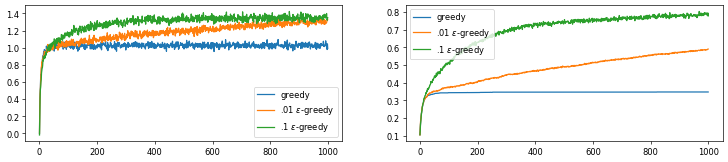

In [28]:
import numpy as np
import matplotlib.pyplot as plt

r_var = 1
q_mu = 0
q_var = 1
k = 10
Steps = 1000
Runs = 2000

class greedy:
    def __init__(self, epsilon, steps, q):
        self.e = epsilon
        self.steps = steps
        self.r = np.zeros(steps)
        self.q = q
        self.sum_r = np.zeros(k)
        self.sum_a = np.zeros(k)
        self.actions = np.zeros(steps)
        return
    
    def select_action(self):
        if np.random.uniform(0, 1, 1) >= self.e:
            avg_r = np.divide(self.sum_r, self.sum_a, 
                              out=np.zeros_like(self.sum_r), where=self.sum_a!=0)
            a = np.argmax(avg_r)
        else:
            a = np.random.randint(k)
        return a
    
    def get_reward(self, a):
        # normal distributed rewards
        return np.random.normal(self.q[a], 1, 1)
    
    def run(self):
        for i in range(self.steps):
            a = self.select_action()
            self.actions[i] = a
            r = self.get_reward(a)
            self.r[i] = r
            self.sum_a[a] += 1
            self.sum_r[a] += r
        return self.r
    
    def get_actions(self):
        return self.actions

def plot_rewards(ax, r1, r2, r3):
    x = np.arange(Steps)
    ax.plot(x, r1, label=r"greedy")
    ax.plot(x, r2, label=r".01 $\varepsilon$-greedy")
    ax.plot(x, r3, label=r".1 $\varepsilon$-greedy")
    ax.legend()
    return

def plot_actions(ax, a1, a2, a3):
    x = np.arange(Steps)
    ax.plot(x, a1, label=r"greedy")
    ax.plot(x, a2, label=r".01 $\varepsilon$-greedy")
    ax.plot(x, a3, label=r".1 $\varepsilon$-greedy")
    ax.legend()
    return

def main():
    fig = plt.figure(figsize=(15, 3), dpi=60)
    ax1, ax2 = fig.subplots(1, 2)
    r1 = np.zeros(Steps)
    r2 = np.zeros(Steps)
    r3 = np.zeros(Steps)
    a1 = np.zeros(Steps)
    a2 = np.zeros(Steps)
    a3 = np.zeros(Steps)
    for i in range(Runs):
        # solving a problem, in this machine, different actions have different expected rewards
        q = np.random.normal(0, 1, k)
        best_a = np.argmax(q)
        g1 = greedy(0, Steps, q)
        r1 += g1.run()
        a1 += 1.0*(g1.get_actions() == best_a)
        g2 = greedy(.01, Steps, q)
        r2 += g2.run()
        a2 += 1.0*(g2.get_actions() == best_a)
        g3 = greedy(.1, Steps, q)
        r3 += g3.run()
        a3 += 1.0*(g3.get_actions() == best_a)
    r1 = r1/Runs
    r2 = r2/Runs
    r3 = r3/Runs
    a1 = a1/Runs
    a2 = a2/Runs
    a3 = a3/Runs
    plot_rewards(ax1, r1, r2, r3)
    plot_actions(ax2, a1, a2, a3)
    return

if __name__=="__main__":
    main()

- The graph on the left-hand side represents the average reward of different methods at the time steps $[1, 1000]$. From this figure, we can see that the greedy method obtains lower rewards comparing to the other methods, which is significant worse in the long run because it often got stuck performing suboptimal actions.
- The graph on the right-hand side shows that 
  - The greedy method found the optimal action in only approximately one-third of the tasks. The remaining two-third are never used again because they disappoints the method in the initial time steps. 
  - In constrast, the $\varepsilon$-greedy methods performs better because they continued to explore and to improve theri chances of recognizing the optimal action. The $\varepsilon = 0.1$ explored more, and usually found the optimal action earlier, but it never selectd that action more than $91%$ of the time. The $\varepsilon = 0.01$ method improved more slowly, but eventually would perfirm better than the $\varepsilon=0.1$ method.
  
  
### Which method to pick

The advantage of $\varepsilon$-greedy over greedy methods depends on the task.

- For noiser rewards it takes more exploration to find the optimal action.
- For the rewards with less variance, we can soon find the optimal action such that we only need less exploration.
- Extremely, for deterministic rewards, the greedy method would know the true value of each action after trying it once.

The preceeding discussion are based on stationary probability distribution case. However, for the non-stationary case, i.e. the values (rewards) of the actions change over time, exploration is still needed, which will be discussed in the next few chapters.


# Incremental Implementation

$$\begin{align*}
Q_{n+1} &= \frac{1}{n}\sum_{i=1}^nR_{i}\\
&= \frac{1}{n}\left(R_n + \sum_{i=1}^{n-1}R_i\right)\\
&= \frac{1}{n}\left(R_n + (n-1)\frac{1}{n-1}\sum_{i=1}^nR_i\right)\\
&= \frac{1}{n}\left(R_n + (n-1)Q_n\right)\\
&= \frac{1}{n}\left(R_n + nQ_n - Q_n\right)\\
&= Q_n + \frac{1}{n}\Big[R_n - Q_n\Big]
\end{align*}$$

This update rule is of a form that occurs frequently throughout this book. The general form is 

$$\text{NewEstimate}\leftarrow \text{OldEstimate} + \text{StepSize}\Big[\text{Target}-\text{OldEstimate}\Big] $$

- The expression $\Big[\text{Target}-\text{OldEstimate}\Big]$ is an error in the estimate. It is recuded by taking a step toward the "Target". The targetis persumed to indicate a desirable direction in which to move, though it may be noisy. In the case above, the target is the nth reward.
- The $\text{StepSize}$ used in the incremental method changes from time step to time step. In processing the nth reward for action $a$, the method uses the step-size parameter $\frac{1}{n}$. In this book we denote the step-size parameter by $\alpha$ or, more generally by $\alpha_t(a)$.

Pseudocode:
> $\text{Initialize, for}  a=1 \text{to} /k$:
> - $Q(a)\leftarrow 0$
> - $N(a)\leftarrow 0$
>
> $\text{Loop forever}$
> - $A\leftarrow \left\{\begin{array}{ll}
\text{select randomly} & \text{with probability }\varepsilon\\
\underset{a}{argmax}Q(a) & \text{with probability } 1-\varepsilon
\end{array}\right.$
> - $R\leftarrow \text{bandit}(A)$
> - $N(A)\leftarrow N(A) + 1$
> - $Q(A)\leftarrow Q(A) + \frac{1}{N(A)}[R-Q(A)]$